In [1]:
f_func <- "./functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))

f_data_loading <- "./data_loading.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_data_loading, '--to=script', '--stdout'), stdout = TRUE)))

Loading required package: Rsamtools

Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: Biostrings



Warning message:
“no DISPLAY variable so Tk is not available”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded TSdist v3.7.1. See ?TSdist for help, citation("TSdist") for use in publication.


Loading required package: dtplyr

Loading required package: profvis

Loading required package: ggforce

Loading required package: pracma


Attaching package: ‘pracma’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:Hmisc’:

    ceil


Loading required package: rstatix


Attaching package: ‘rstatix’


The following object is masked from ‘package:IRanges’:

    desc


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggpubr

Loading required package: jsonlite


Attaching package: ‘jsonlite’


The following object is masked from ‘package:R.utils’:

    validate


The following object is masked from ‘package:purrr’:

    flatten


Loading

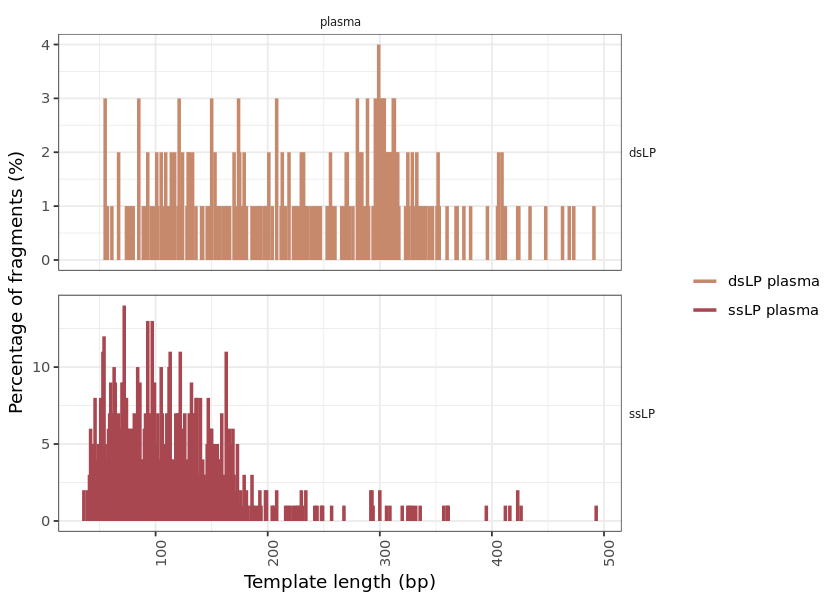

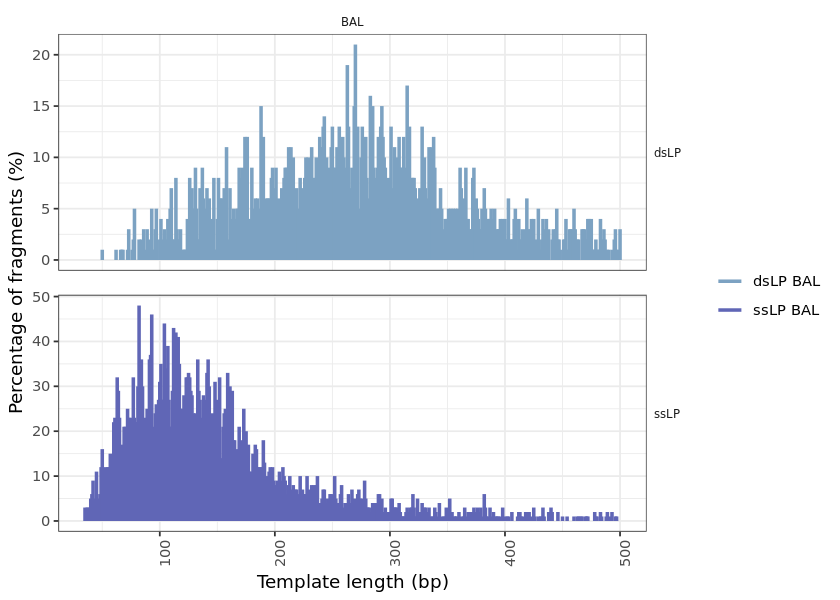

In [18]:
options(repr.plot.width=7, repr.plot.height=5)
for(sel_sample in c("plasma", "BAL")){
    Afum_length <- Afum_IS_meta %>% 
        filter(read == "R1") %>% 
        filter(origin != "controls") %>% 
        filter(type != "ds-wcDNA") %>%    
        mutate(TLEN = abs(TLEN)) %>% 
        filter(sample == sel_sample) %>% 
        group_by(sample, type, sample_type, TLEN) %>% 
        summarise(sumCount = sum(Count), .groups = "keep") %>% 
        mutate(sample_type = factor(sample_type, levels = c("dsLP plasma", "ssLP plasma", 
                                                            "dsLP BAL", "ssLP BAL"))) %>%  
        ggplot(aes(x = TLEN, y = sumCount, col = sample_type)) + 
            geom_segment(aes(x = TLEN, xend = TLEN, y = 0, yend = sumCount), size = 1) + 
            facet_grid(cols = vars(sample), rows = vars(type), drop = TRUE, scales = "free") + 
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                             "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
            xlab("Template length (bp)") + ylab("Percentage of fragments (%)") + labs(color = "") + 
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1), 
                strip.background = element_rect(color = "white", fill = "white"), 
                strip.text.x = element_text(size = 7), 
                panel.spacing = unit(1, "lines"), 
                strip.text.y = element_text(angle = 0, size = 7, hjust = 0)) 

    Afum_length %>% print()

    ggsave(paste0("../../output_figures/Afumigatus_", sel_sample, "_length.png"), plot = Afum_length, 
                width = 7, height = 5)
    ggsave(paste0("../../output_figures/Afumigatus_", sel_sample, "_length.pdf"), plot = Afum_length, 
                width = 7, height = 5)
}

In [ ]:
data_grouped <- data.frame(
  group = c("A", "A", "B", "B"),
  value = c(1, 2, 4, 5),
  frequency = c(2, 3, 1, 4)
)

# Expand the data frame according to frequencies
expanded_grouped_data <- data_grouped %>%
  uncount(weights =  frequency) # `uncount()` expands according to frequency
expanded_grouped_data

# Calculate IQR per group using dplyr
iqr_by_group <- expanded_grouped_data %>%
  group_by(group) %>%
  summarise(IQR = IQR(value), .groups = "drop")


In [19]:
freq_tbl_Afum_IS_meta <- Afum_IS_meta %>% 
        filter(read == "R1") %>% 
        filter(origin != "controls") %>% 
        filter(type != "ds-wcDNA") %>%    
        mutate(TLEN = abs(TLEN)) %>% 
        group_by(sample, type, sample_type, TLEN) %>% 
        summarise(sumCount = sum(Count), .groups = "keep") 

expanded_tbl_Afum_IS_meta <- freq_tbl_Afum_IS_meta %>% 
    uncount(weights = sumCount) 


quartiles_tlen <- expanded_tbl_Afum_IS_meta %>%
    group_by(sample_type) %>% 
    summarise(
        Q1 = quantile(TLEN, 0.25, na.rm = TRUE),
        Q2 = quantile(TLEN, 0.50, na.rm = TRUE),  # Median
        Q3 = quantile(TLEN, 0.75, na.rm = TRUE),
        .groups = "drop"
    )
quartiles_tlen

sample_type,Q1,Q2,Q3
<chr>,<dbl>,<dbl>,<dbl>
dsLP BAL,204,270.0,330
dsLP plasma,150,237.5,307
ssLP BAL,94,129.0,175
ssLP plasma,72,105.0,142
